# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import time

In [2]:
X_ = pd.read_csv('./output/X_train.csv')
y_ = X_['subject']
X_.drop(['Unnamed: 0','subject'], inplace=True, axis=1) 
X_.info()
X_.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [3]:
X_test = pd.read_csv('./output/X_test.csv')
y_test = X_test['subject']
X_test.drop(['Unnamed: 0','subject'], inplace=True, axis=1) 
X_test.info()
X_test.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 12.6 MB


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857


### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [4]:
# id_random = int(input('Informe o valor do random_state: '))
id_random = 846846
X_train, X_valid, y_train, y_valid = train_test_split(X_, y_, test_size=.25, random_state=id_random//3)

In [5]:
tot_base=len(X_)+len(X_test)
print('Conferência das bases:')
print(f'Base teste....: {len(X_test)} linhas = {round((len(X_test) /tot_base*100),2)}%')
print(f'Base treino...: {len(X_train)} linhas = {round((len(X_train) /tot_base*100),2)}%')
print(f'Base validação: {len(X_valid)} linhas = {round((len(X_valid) /tot_base*100),2)}%')
print(f'Total.........:{tot_base}')

Conferência das bases:
Base teste....: 2947 linhas = 28.61%
Base treino...: 5514 linhas = 53.54%
Base validação: 1838 linhas = 17.85%
Total.........:10299


### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [6]:
%%time
caminho = DecisionTreeClassifier(random_state=id_random, max_depth=4).cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

positivos = [num for num in list(ccp_alphas) if num >= 0] 
pos_count = len(positivos) 
  
print("ccp_alphas positivos: ", pos_count) 
print("ccp_alphas negativos ", len(list(ccp_alphas)) - pos_count) 

ccp_alphas positivos:  13
ccp_alphas negativos  0
Wall time: 1.37 s


In [7]:
start_time = time.time()

clf = DecisionTreeClassifier(random_state=id_random, max_depth=4).fit(X_train, y_train)
feature_importances = clf.feature_importances_
elapsed_time = time.time() - start_time

sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_names = X_train.columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]


variaveis_importantes = pd.DataFrame(index=sorted_feature_names)
variaveis_importantes['sorted_indices'] = sorted_indices
variaveis_importantes['sorted_importances'] = sorted_importances
best_var=variaveis_importantes.sort_values(by='sorted_importances',ascending=False)
print(f'MELHORES VARIÁVEIS ENCONTRADAS \n{best_var[0:3].index.tolist()}')
print(f"\nTempo gasto para computar a importância das variáveis: {elapsed_time:.0f} segundos")

MELHORES VARIÁVEIS ENCONTRADAS 
['tGravityAcc-max()-Y', 'tGravityAcc-max()-Z', 'tGravityAcc-sma()']

Tempo gasto para computar a importância das variáveis: 1 segundos


In [8]:
start_time = time.time()

feature_names = list(X_train.columns)
forest = RandomForestClassifier(random_state=id_random,max_depth=4).fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)
elapsed_time = time.time() - start_time

best_forest_importances = forest_importances.sort_values(ascending=False).iloc[0:3]
std2=list(best_forest_importances)

print(f'MELHORES VARIÁVEIS ENCONTRADAS \n{best_forest_importances.iloc[0:3].index.tolist()}')
print(f"\nTempo gasto para computar a importância das variáveis: {elapsed_time:.0f} segundos")

MELHORES VARIÁVEIS ENCONTRADAS 
['tGravityAcc-mean()-Z', 'tGravityAcc-max()-Z', 'angle(Z,gravityMean)']

Tempo gasto para computar a importância das variáveis: 4 segundos


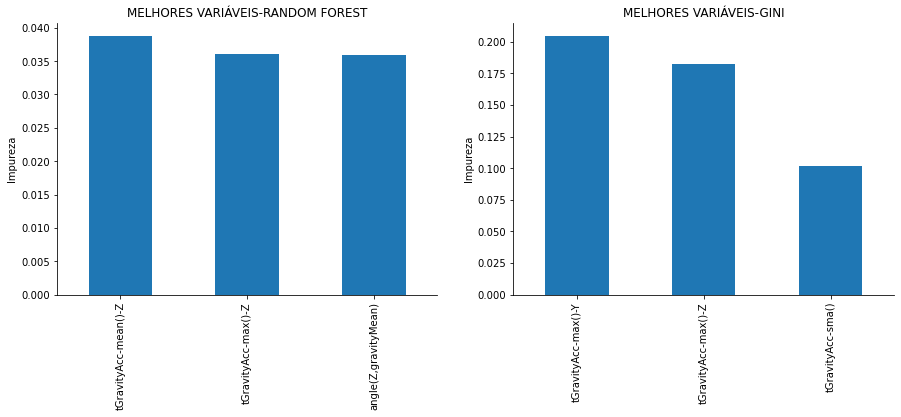

In [9]:
plt.close('all')
plt.rc('figure', figsize=(15, 5))
fig, axes = plt.subplots(1, 2)

best_forest_importances.plot.bar(ax=axes[0])
axes[0].set_title("MELHORES VARIÁVEIS-RANDOM FOREST")
axes[0].set_ylabel("Impureza")
best_var['sorted_importances'][0:3].plot.bar(ax=axes[1])
axes[1].set_title("MELHORES VARIÁVEIS-GINI")
axes[1].set_ylabel("Impureza")

# fig.tight_layout()

# sns.barplot(x='posse_de_imovel',y='renda',data=df, ax=axes[0,0])
# sns.barplot(x='posse_de_veiculo',y='renda',data=df, ax=axes[0,1])
sns.despine()


In [10]:
best_forest=forest_importances.sort_values(ascending=False).iloc[0:3].index.tolist()
best_gini=best_var['sorted_importances'][0:3].index.tolist()
print(f'Random Forest {best_forest}')
print(f'Gini          {best_gini}')

Random Forest ['tGravityAcc-mean()-Z', 'tGravityAcc-max()-Z', 'angle(Z,gravityMean)']
Gini          ['tGravityAcc-max()-Y', 'tGravityAcc-max()-Z', 'tGravityAcc-sma()']


### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [11]:
%%time
melhor_variavel = int(input('Informe (1) para Random Forest ou (2) Gini:'))
if melhor_variavel == 1:
    var=best_forest
    text='Random Forest'
elif melhor_variavel == 2:
    var=best_gini
    text='Gini'
else:
    print('Opção incorreta')    

x_train = X_train[var]
x_test = X_test[var]
x_valid = X_valid[var]

caminho = DecisionTreeClassifier(random_state=id_random,max_depth = 4).cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities
print(f'Variáveis {text}: {var}')
print(f'ccp_alphas gerados: {ccp_alphas.size}')

Informe (1) para Random Forest ou (2) Gini: 2


Variáveis Gini: ['tGravityAcc-max()-Y', 'tGravityAcc-max()-Z', 'tGravityAcc-sma()']
ccp_alphas gerados: 14
Wall time: 3.06 s


In [12]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=id_random, ccp_alpha=ccp_alpha).fit(x_train, y_train)
    clfs.append(clf)

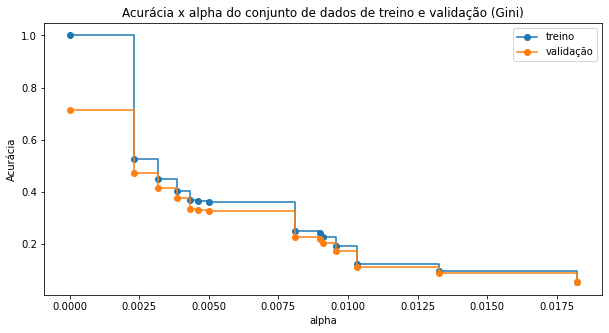

In [13]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
valid_scores = [clf.score(x_valid, y_valid) for clf in clfs]
plt.close('all')
plt.rc('figure', figsize=(10, 5))


fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title(f'Acurácia x alpha do conjunto de dados de treino e validação ({text})')
ax.plot(ccp_alphas, train_scores, marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas, valid_scores, marker='o', label="validação",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [14]:
ind_melhor_arvore = len(valid_scores) - valid_scores[::-1].index(max(valid_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

print(f'Acurácia da melhor árvore na base de validação: {valid_scores[ind_melhor_arvore]*100:.2f}')

melhor_arvore

Acurácia da melhor árvore na base de validação: 71.38


DecisionTreeClassifier(random_state=846846)

### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

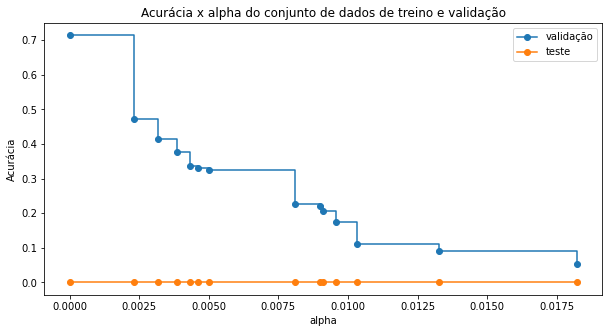

In [15]:
valid_scores = [clf.score(x_valid, y_valid) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e validação")
ax.plot(ccp_alphas, valid_scores, marker='o', label="validação",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

Acurácia: 0.00



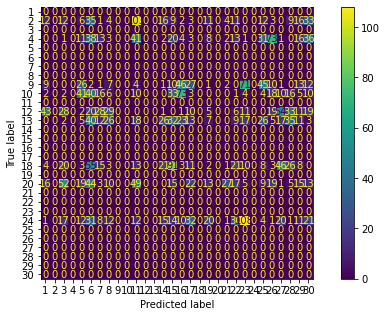

In [16]:
acuracia_teste = melhor_arvore.score(x_test, y_test)

print(f'Acurácia: {acuracia_teste*100:.2f}\n')
plot_confusion_matrix(melhor_arvore, x_test, y_test);

### Conclusão

O resultado obtido na base de teste apresentou uma acurácia = 0, evidenciando um claro cenário de overfitting (quando nos dados de treino o modelo apresentam um bom desempenho, porém quando utilizamos os dados de testeo resultado acaba sendo ruim).

Ao unificar as bases e redividí-las novamente o resultado encontrado foi bem diferente, com um acurácia de 74%, conforme abaixo:
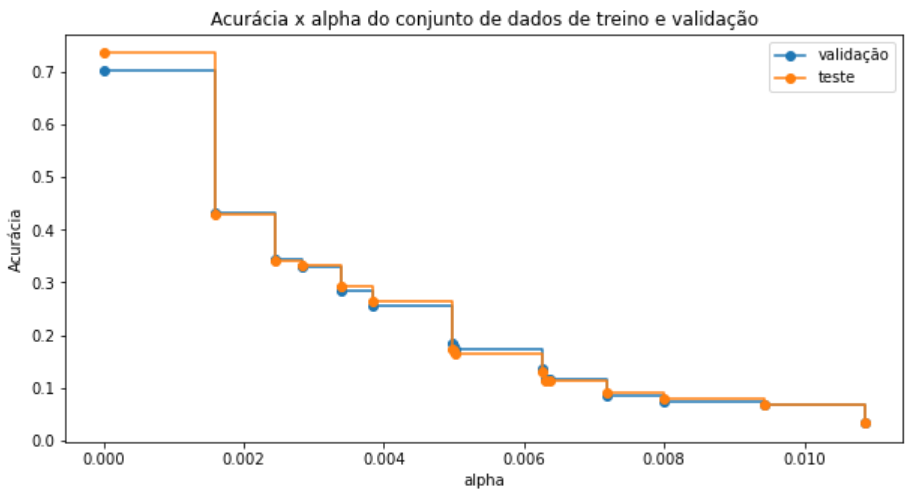

